In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import athena_read as ar
from glob import glob
from Constants import Constants
import planet_wind_utils as pw

c=Constants()

%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.2
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

Constants defined...


In [14]:
base_dir = "/Users/morganmacleod/DATA/athenaruns/planet_wind/"
#base_dir = ""
orb = pw.read_trackfile(base_dir+"pm_trackfile.dat")
print "ORB: ... ", orb.colnames


# NOTE: needs to be a full 3D output, not a slice!!!
myfile = base_dir+"PLANET_WIND_LAMBDA_2d_6.out1.00000.athdf"
mylevel = 0

# Read the whole (3d dataset -- no slice)
d=pw.read_data(myfile,orb,rsoft2=1.e10,level=mylevel,get_cartesian=True)

t= d['Time']
rcom,vcom = pw.rcom_vcom(orb,t)
x2,y2,z2 = pw.pos_secondary(orb,t)
print t

reading orbit file for planet wind simulation...
ORB: ...  ['ncycle', 'time', 'dt', 'm1', 'm2', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'sep', 'r', 'rhat', 'v', 'vmag', 'vhat', 'xcom', 'ycom', 'zcom', 'vxcom', 'vycom', 'vzcom', 'rcom', 'vcom']
read_data...reading file /Users/morganmacleod/DATA/athenaruns/planet_wind/PLANET_WIND_LAMBDA_2d_6.out1.00000.athdf
 ...file read, constructing arrays
 ...gamma= 1.66666666667
...getting cartesian arrays...
0.0


# Rays with arbitrary inclination/angle

Defined by "phase" and "inclination". They end at the stellar surface. 

The original simulation plane $xyz$ is rotated by these angles to form the projected observer plane $YZ$ with the observer in the $-X$ direction. 

In [15]:
# get interpolating function for a given mesh variable
rho_interp = pw.get_interp_function(d,"rho")

In [16]:
# define a ray with properties
ray = pw.get_ray(YZoffset=(3.e10,0),
              star_pos=(1.e11,0,0),
              length=2.e11,
              phase=np.pi/16,
              inclination=0,
              rstar=6.e10,
              npoints=100)

# interpolate rho along that ray
# NOTE, this will return an error if they ray crosses out of the domain 
## (ie inside the planet, or out of the other limits)
ray['rho'] = rho_interp( (ray['phi'],ray['theta'],ray['r']) )

[4.31841922e+10 1.92863679e+10 0.00000000e+00]


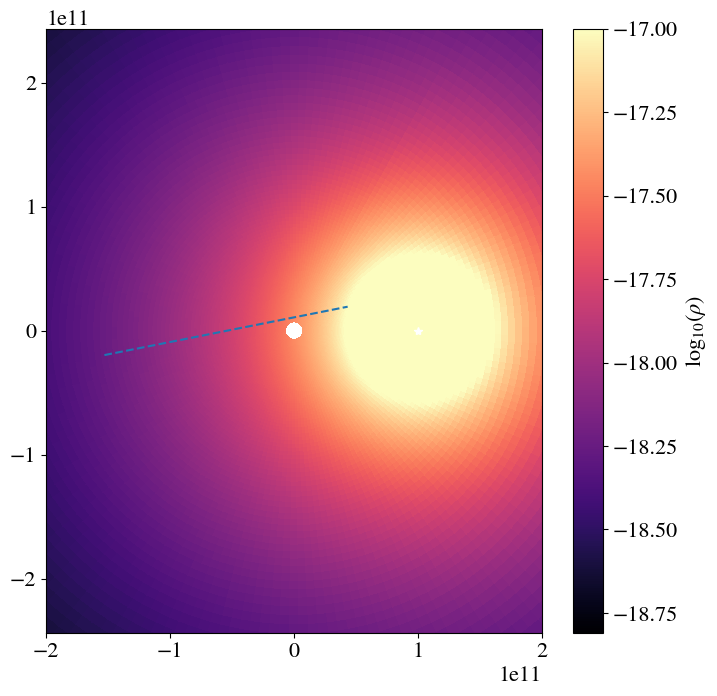

In [17]:
lim = 2.e11
skip = 16

plt.figure(figsize=(8,8) )
plt.pcolormesh(pw.get_plot_array_midplane(d['x'][:,len(d['x2v'])/2,:]),
               pw.get_plot_array_midplane(d['y'][:,len(d['x2v'])/2,:]),
               np.log10(d['rho'][:,len(d['x2v'])/2,:]),
               cmap=plt.cm.magma)
plt.colorbar(label=r"$\log_{10} \left( \rho \right)$")


plt.plot(ray['x'],ray['y'],'--')


plt.axis('equal')


plt.plot(x2,y2,'w*')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

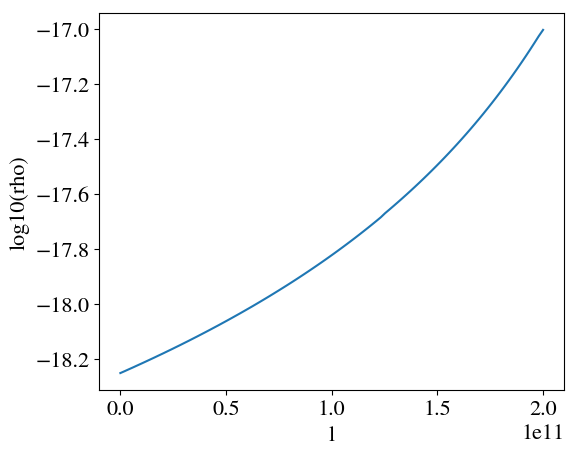

In [18]:
plt.plot(ray['l'],np.log10(ray['rho']))
plt.xlabel('l')
plt.ylabel('log10(rho)')
plt.show()